In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("banking.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [4]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [5]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [6]:
df.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,...,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,80631.500000,25982.666640,4.500000,33.316340,5.004617e+08,50505.123449,4197.270835,5.368820,5.533570,14.53208,...,21.08141,13.313120,10.470323,5.798250,1426.220376,32.285173,221.220460,107.699208,55.101315,392.697586
std,43301.486619,14340.543051,2.291299,10.764812,2.908267e+08,38299.422093,3186.432497,2.593314,2.067098,8.74133,...,14.80456,6.237166,6.609481,3.867826,1155.129026,5.116875,99.680716,132.267056,39.006932,201.652719
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,303.645417,0.000000,0.000000,1.00000,...,0.00000,0.000000,0.500000,0.000000,0.230000,20.000000,1.000000,0.000000,0.000000,0.007760
25%,43132.750000,13664.500000,2.750000,24.000000,2.451686e+08,19342.972500,1626.594167,3.000000,4.000000,7.00000,...,10.00000,9.000000,5.380000,3.000000,566.072500,28.052567,144.000000,29.268886,27.959111,267.615983
50%,80631.500000,25777.000000,4.500000,33.000000,5.006886e+08,36999.705000,3095.905000,5.000000,5.000000,13.00000,...,18.00000,14.000000,9.400000,5.000000,1166.155000,32.305784,219.000000,66.462304,45.156550,333.865366
75%,118130.250000,38385.000000,6.250000,42.000000,7.560027e+08,71683.470000,5957.715000,7.000000,7.000000,20.00000,...,28.00000,18.000000,14.850000,8.000000,1945.962500,36.496663,302.000000,147.392573,71.295797,463.215683
max,155629.000000,50999.000000,8.000000,56.000000,9.999934e+08,179987.280000,15204.633333,11.000000,11.000000,34.00000,...,62.00000,25.000000,29.980000,17.000000,4998.070000,50.000000,404.000000,1779.103254,434.191089,1183.930696


In [7]:
object_columns = df.select_dtypes("object").columns.to_list()
number_columns = df.drop(object_columns, axis=1).columns.to_list()

In [8]:
print(len(object_columns))
print(object_columns)
print(len(number_columns))
print(number_columns)

7
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Credit_Score']
21
['ID', 'Customer_ID', 'Month', 'Age', 'SSN', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


<Axes: xlabel='Credit_Score'>

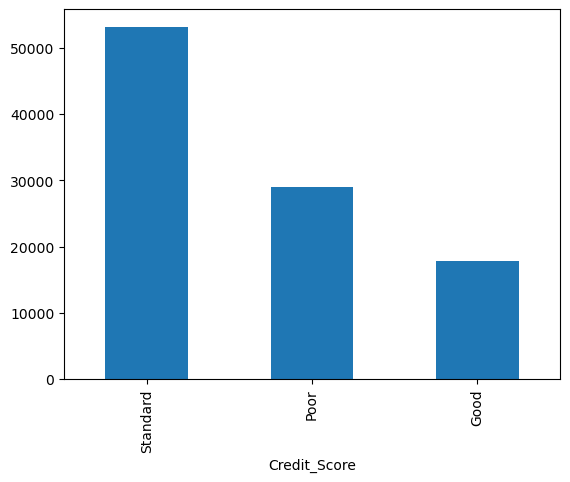

In [9]:
df["Credit_Score"].value_counts().plot(kind="bar")

Những cột chứa ngoại lai: Annual_Income, Monthly_Inhand_Salary, Delay_from_due_date,
Changed_Credit_Limit, Num_Credit_Inquiries, Outstanding_Debt, Credit_Utilization_Ratio, 
Total_EMI_per_month, Amount_invested_monthly, Monthly_Balance

Ngoại lai 

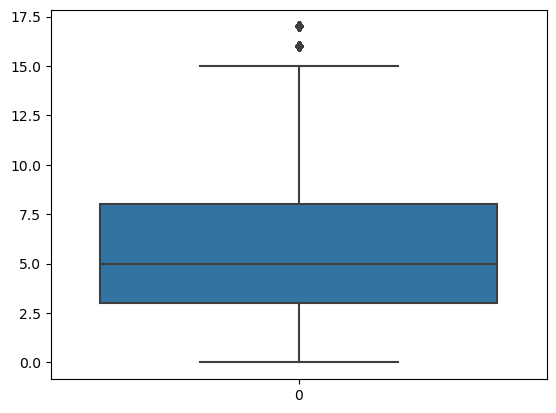

In [10]:
import seaborn as sns
fig, axs = plt.subplots()
sns.boxplot(data=df["Num_Credit_Inquiries"])
plt.show()

"Monthly_Inhand_Salary", "Delay_from_due_date",
"Changed_Credit_Limit", "Num_Credit_Inquiries", "Outstanding_Debt", "Credit_Utilization_Ratio", 
"Total_EMI_per_month", "Amount_invested_monthly", "Monthly_Balance"

In [11]:
process_noise = ["Amount_invested_monthly", "Num_Credit_Inquiries", "Delay_from_due_date", "Monthly_Inhand_Salary", "Outstanding_Debt",
                "Monthly_Balance", "Annual_Income", "Changed_Credit_Limit", "Credit_Utilization_Ratio", "Total_EMI_per_month"]


In [12]:
df_iqr = df.copy()

In [13]:
for _encode in process_noise:
    q25, q75 = np.quantile(df_iqr[_encode], 0.25), np.quantile(df_iqr[_encode], 0.75)
    iqr = q75 - q25
    lower, upper = q25 - 1.25*iqr, q75 + 1.25*iqr
    df_iqr = df_iqr[(df_iqr[_encode] < upper) & (df_iqr[_encode] > lower)]

Sau khi sử lý ngoại lai

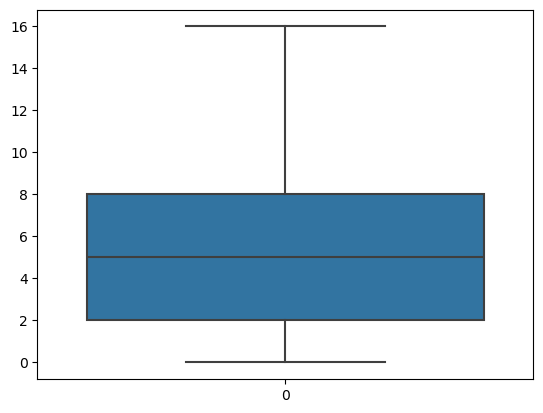

In [14]:
fig, axs = plt.subplots()
sns.boxplot(data=df_iqr["Num_Credit_Inquiries"])
plt.show()

In [15]:
df_iqr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62019 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        62019 non-null  int64  
 1   Customer_ID               62019 non-null  int64  
 2   Month                     62019 non-null  int64  
 3   Name                      62019 non-null  object 
 4   Age                       62019 non-null  float64
 5   SSN                       62019 non-null  float64
 6   Occupation                62019 non-null  object 
 7   Annual_Income             62019 non-null  float64
 8   Monthly_Inhand_Salary     62019 non-null  float64
 9   Num_Bank_Accounts         62019 non-null  float64
 10  Num_Credit_Card           62019 non-null  float64
 11  Interest_Rate             62019 non-null  float64
 12  Num_of_Loan               62019 non-null  float64
 13  Type_of_Loan              62019 non-null  object 
 14  Delay_from_

In [16]:
df_iqr

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard


In [17]:
df_iqr.describe()

,ID,Customer_ID,Month,Age,SSN,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,...,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,62019.000000,62019.000000,62019.000000,62019.000000,6.201900e+04,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,...,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000,62019.000000
mean,80634.944823,25780.893226,4.473532,33.760686,4.998912e+08,35107.594434,2923.548136,5.092004,5.270514,13.340767,...,17.699898,12.654364,9.522023,5.280366,1117.486843,31.949796,236.604895,60.991609,41.928023,349.619120
std,43165.476867,14345.667969,2.290615,10.872999,2.919858e+08,21656.576478,1808.113790,2.458718,1.928662,8.074970,...,10.928999,5.845390,5.346797,3.623042,751.643130,4.983674,92.002034,51.838035,23.157164,113.352381
min,5634.000000,1006.000000,1.000000,14.000000,8.134900e+04,7005.930000,332.128333,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.500000,0.000000,0.230000,20.880082,1.000000,0.000000,0.000000,52.864920
25%,43162.000000,13466.000000,2.000000,25.000000,2.424344e+08,17908.010000,1505.966667,3.000000,4.000000,7.000000,...,9.000000,9.000000,5.290000,2.000000,515.730000,27.742657,174.000000,22.015360,24.942524,273.374198
50%,80684.000000,25415.000000,4.000000,33.000000,4.994068e+08,30635.160000,2540.355833,5.000000,5.000000,12.000000,...,16.000000,13.000000,9.110000,5.000000,1040.210000,31.966822,232.000000,47.561492,37.624755,327.717092
75%,117995.500000,38255.000000,6.000000,42.000000,7.605085e+08,44611.390000,3759.930000,7.000000,7.000000,18.000000,...,25.000000,17.000000,13.140000,8.000000,1474.480000,36.166206,312.000000,86.720417,54.497753,412.122124
max,155629.000000,50999.000000,8.000000,56.000000,9.999573e+08,104658.750000,9004.135000,11.000000,11.000000,34.000000,...,50.000000,25.000000,24.170000,16.000000,3397.760000,43.468739,404.000000,210.641202,125.046940,675.100487


Encoder Credit_Score

In [18]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df_iqr["Credit_Label"] = encode.fit_transform(df_iqr["Credit_Score"])
Credit_Labels = encode.classes_

In [19]:
print(len(Credit_Labels))
print(Credit_Labels)

3
['Good' 'Poor' 'Standard']


In [20]:
print(df_iqr["Credit_Label"])

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Label, Length: 62019, dtype: int32


In [21]:
df_iqr.drop("Credit_Score", axis=1, inplace=True)

In [22]:
x = df_iqr.drop("Credit_Label", axis=1)
y = df_iqr["Credit_Label"]

In [23]:
x

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.465380,High_spent_Small_value_payments,312.494089
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.465380,Low_spent_Large_value_payments,284.629162
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.465380,Low_spent_Medium_value_payments,331.209863
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,31.377862,268.0,No,49.574949,21.465380,Low_spent_Small_value_payments,223.451310
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,4.0,Good,809.98,24.797347,269.0,No,49.574949,21.465380,High_spent_Medium_value_payments,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,39628.99,3359.415833,4.0,...,3.0,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979


In [24]:
y

0        0
1        0
2        0
3        0
4        0
        ..
99995    1
99996    1
99997    1
99998    2
99999    1
Name: Credit_Label, Length: 62019, dtype: int32

In [25]:
object_columns = x.select_dtypes("object").columns.to_list()
number_columns = x.drop(object_columns, axis=1).columns.to_list()

In [26]:
print(len(object_columns))
print(object_columns)

6
['Name', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']


In [27]:
df_iqr["Name"].value_counts()

Name
Ryan Vlastelicad     39
env                  39
Jessicad             36
Michaelr             32
Alexei Oreskovics    32
                     ..
Gerry Shihg           1
Leongi                1
Estelle Shirboni      1
Foo Yund              1
Francescao            1
Name: count, Length: 7370, dtype: int64

In [28]:
df_iqr["Occupation"].value_counts()

Occupation
Lawyer           4477
Journalist       4368
Architect        4343
Entrepreneur     4281
Engineer         4241
Developer        4195
Media_Manager    4168
Mechanic         4159
Scientist        4072
Accountant       4049
Writer           4015
Teacher          4008
Doctor           3996
Musician         3840
Manager          3807
Name: count, dtype: int64

In [29]:
df_iqr["Type_of_Loan"].value_counts()

Type_of_Loan
No Data                                                                                                                                                    7407
Not Specified                                                                                                                                               932
Personal Loan                                                                                                                                               925
Credit-Builder Loan                                                                                                                                         911
Debt Consolidation Loan                                                                                                                                     886
                                                                                                                                                           ... 
Credit-Builder Loan, Payday

In [30]:
df_iqr["Credit_Mix"].value_counts()

Credit_Mix
Standard    34695
Good        19433
Bad          7891
Name: count, dtype: int64

In [31]:
df_iqr["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    30794
No     23825
NM      7400
Name: count, dtype: int64

In [32]:
df_iqr["Payment_Behaviour"].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      20611
High_spent_Medium_value_payments    11874
Low_spent_Medium_value_payments      8689
High_spent_Small_value_payments      7650
Low_spent_Large_value_payments       7247
High_spent_Large_value_payments      5948
Name: count, dtype: int64

In [33]:
object_columns

['Name',
 'Occupation',
 'Type_of_Loan',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [34]:
# cat_feats = ['Credit_Mix', 'Payment_of_Min_Amount','Payment_Behaviour'] 
# x = pd.get_dummies(x, columns=cat_feats, drop_first=True)

In [35]:
# for _obj in cat_feats:
#     object_columns.remove(_obj)

In [36]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
for i in object_columns:
    x[i] = encode.fit_transform(x[i])

In [37]:
x

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,5634,3392,1,9,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,26.822620,265.0,1,49.574949,21.465380,2,312.494089
1,5635,3392,2,9,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.944960,266.0,1,49.574949,21.465380,3,284.629162
2,5636,3392,3,9,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,28.609352,267.0,1,49.574949,21.465380,4,331.209863
3,5637,3392,4,9,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,31.377862,268.0,1,49.574949,21.465380,5,223.451310
4,5638,3392,5,9,23.0,821000265.0,12,19114.12,1824.843333,3.0,...,4.0,1,809.98,24.797347,269.0,1,49.574949,21.465380,1,341.489231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,155625,37932,4,4732,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,34.663572,378.0,1,35.104023,24.028477,0,479.866228
99996,155626,37932,5,4732,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,40.565631,379.0,1,35.104023,24.028477,1,496.651610
99997,155627,37932,6,4732,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,41.255522,380.0,1,35.104023,24.028477,0,516.809083
99998,155628,37932,7,4732,25.0,78735990.0,9,39628.99,3359.415833,4.0,...,3.0,1,502.38,33.638208,381.0,1,35.104023,24.028477,3,319.164979


In [38]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
smote = RandomOverSampler(random_state=42)
x, y = smote.fit_resample(x, y)

Standardized Data

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
sc.fit(x)
x = sc.transform(x)

In [40]:
x

array([[0.00000000e+00, 4.77266817e-02, 0.00000000e+00, ...,
        1.71658581e-01, 4.00000000e-01, 4.17252215e-01],
       [6.66688890e-06, 4.77266817e-02, 1.42857143e-01, ...,
        1.71658581e-01, 6.00000000e-01, 3.72470259e-01],
       [1.33337778e-05, 4.77266817e-02, 2.85714286e-01, ...,
        1.71658581e-01, 8.00000000e-01, 4.47330493e-01],
       ...,
       [4.50135005e-01, 3.99235893e-01, 8.57142857e-01, ...,
        1.13372486e-01, 2.00000000e-01, 3.72466838e-01],
       [1.61692056e-01, 3.36807153e-01, 1.42857143e-01, ...,
        4.10512375e-01, 2.00000000e-01, 5.88478903e-01],
       [4.44854828e-01, 6.31708439e-01, 8.57142857e-01, ...,
        1.73641899e-01, 6.00000000e-01, 6.42523658e-01]])

In [41]:
x.shape, y.shape

((103314, 27), (103314,))

Spliting Data

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state= 42, shuffle= True, stratify= y)

In [43]:
x_train = x_train.astype('float64')
x_test = x_test.astype('float64')

In [44]:
x_train.shape, y_train.shape

((82651, 27), (82651,))

In [45]:
x_test.shape, y_test.shape

((20663, 27), (20663,))

In [46]:
from collections import Counter
count = Counter(y_train)
num_class = dict(count)
print(num_class)

{0: 27551, 2: 27550, 1: 27550}


Model

In [47]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# from keras.utils import to_categorical
model = RandomForestClassifier(n_estimators=100, random_state= 42, class_weight='balanced')
model.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Đánh giá Model trên toàn bộ tập test

In [48]:
_score = model.score(x_test, y_test)
print(_score)

0.9342302666602139


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_pred = model.predict(x_test)

In [50]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9342302666602139
[[6860    2   25]
 [   1 6761  126]
 [ 492  713 5683]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      6887
           1       0.90      0.98      0.94      6888
           2       0.97      0.83      0.89      6888

    accuracy                           0.93     20663
   macro avg       0.94      0.93      0.93     20663
weighted avg       0.94      0.93      0.93     20663



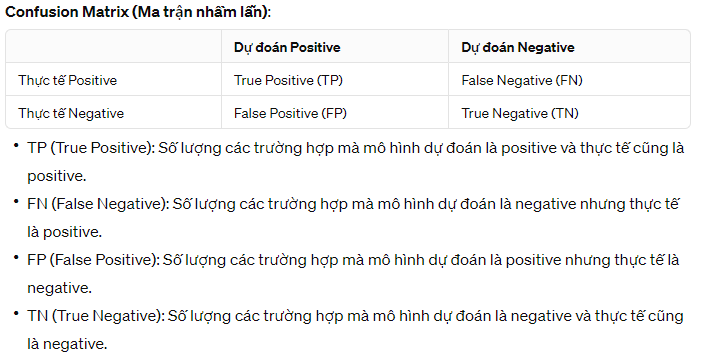
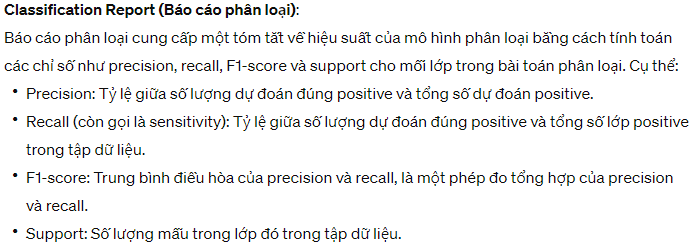

In [51]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
def plot_confusion_matrix(y_test, y_pred, classes):
    colors = ['pink', 'white','red', 'purple', 'orange', 'brown', 'yellow', 'blue', 'green']
    cmap = plt.cm.colors.ListedColormap(colors)
    cm = confusion_matrix(y_test, y_pred)
    # plt.figure(figsize=(10, 4))
    # plt.subplot(1, 2, 1)
    plt.imshow(cm, interpolation='nearest', cmap='rocket')
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.xticks([0, 1, 2], [classes[0], classes[1], classes[2]])
    plt.yticks([0, 1, 2], [classes[0], classes[1], classes[2]])
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='black' if cm[i, j] > cm.max() / 2 else 'white',
                    ha='center', va='center')

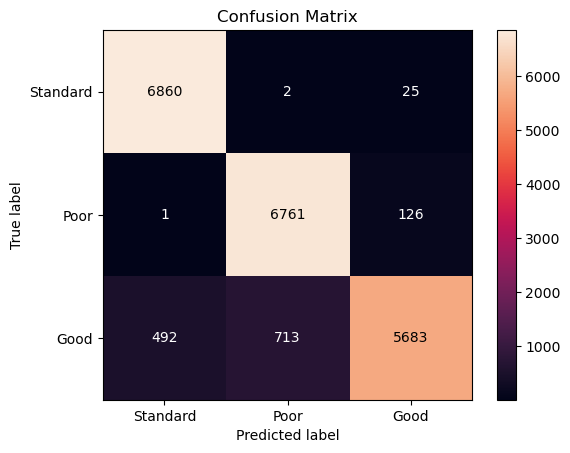

In [52]:
classes = ['Standard', 'Poor', 'Good']
plot_confusion_matrix(y_test, y_pred, classes)

In [53]:
import random as rd
m = rd.randint(0, x_test.shape[0])
X_new = x_test[m]
Y_new = y_test.iloc[m]
X_new = np.expand_dims(X_new, axis=0)
Y_predict = model.predict(X_new)
CreditScore_label_digital = int(Y_predict[0])
print("Giá trị dự đoán: ", Y_predict)
print("Giá Trị thực tế: ", Y_new)
print("Credit_Score: ", Credit_Labels[CreditScore_label_digital])

Giá trị dự đoán:  [2]
Giá Trị thực tế:  2
Credit_Score:  Standard
